Attempt to recreate the Meme vs non-meme program without using the .fastai library


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms, models
import helper
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import importlib
importlib.reload(helper)
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

--2020-05-06 10:15:58--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-05-06 10:15:58 (45.1 MB/s) - ‘helper.py’ saved [2813/2813]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.c

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu"); device

device(type='cuda')

In [0]:
 #Get not meme folder from my gdrive
#from zipfile import ZipFile
#with ZipFile('gdrive/My Drive/Cat_Dog_data.zip', 'r') as archive:
  #archive.extractall('gdrive/My Drive/CatDog')

In [0]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

In [0]:
trainTransform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.Pad(3, padding_mode='reflect'),
                                 transforms.RandomAffine(25),
                                 transforms.ToTensor(),
                                 normalize])
testTransform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [0]:
#path = Path('gdrive/My Drive/CatDog/Cat_Dog_data'); path.ls()
#path = 'gdrive/My Drive/meme or not'
#train_data = datasets.ImageFolder(path + '/train', transform=trainTransform)
#test_data = datasets.ImageFolder(path + '/test', transform=testTransform)
dataloader = datasets.ImageFolder('gdrive/My Drive/meme or not', transform=testTransform)
#trainloader = torch.utils.data.DataLoader(train_data, batch_size=2)
#testloader = torch.utils.data.DataLoader(test_data, batch_size=2)

In [0]:
train_size = int(0.8 * len(dataloader))
test_size = len(dataloader) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataloader, [train_size, test_size])

In [0]:
from copy import copy

train_dataset, test_dataset = torch.utils.data.random_split(dataloader, [train_size, test_size])
train_dataset.dataset = copy(dataloader)

test_dataset.dataset.transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 normalize])

train_dataset.dataset.transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.Pad(3, padding_mode='reflect'),
                                 transforms.RandomAffine(25),
                                 transforms.ToTensor(),
                                 normalize])


In [0]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


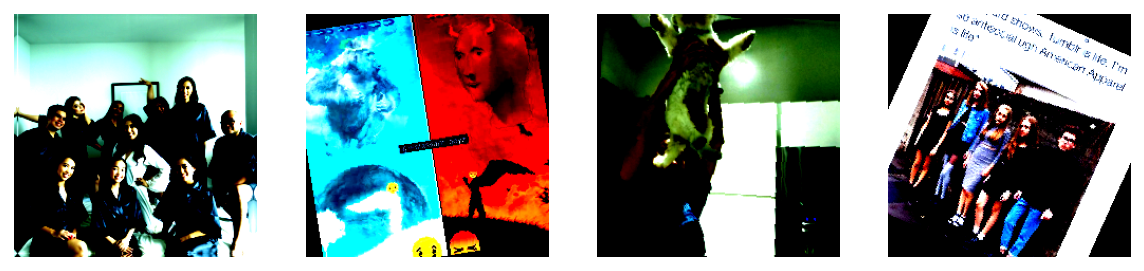

In [0]:
# change this to the trainloader or testloader 
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [0]:

model = models.resnet34(pretrained=True); model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
for param in model.parameters():
  param.requires_grad = False #this freezes the layers so that we don't change their weights, because we're already using a pretrained model

In [0]:
import torch.nn.functional as F
from torch import nn
#define new classifier
classifier = nn.Sequential(
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(256, 2),
    nn.LogSoftmax(dim=1)
)
model.fc = classifier

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr = 0.003) #this then optimizes only the last few layers (aka unfreezes the last layers)
model.to(device);

In [0]:
train_losses, test_losses = [], []
epochs = 4
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    #inputs = images.view(images.shape[0], -1) #when using a given model, no need to change the shape (i think this is because of the conv2d)
    #input = input.view(-1, in_features)
    inputs = images
    output = model(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
    # validation pass here
      model.eval()
      for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        #inputs = images.view(images.shape[0], -1)
        inputs = images
        log_ps = model(inputs)
        test_loss += criterion(log_ps, labels)
        ps = torch.exp(log_ps) # just converting from e^x to a percentage
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
      #print(f"Accuracy: {running_loss/len(trainloader)}")
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    model.train()
    print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    
    running_loss = 0;
    

Epoch: 1/4..  Training Loss: 0.550..  Test Loss: 0.294..  Test Accuracy: 0.913
Epoch: 2/4..  Training Loss: 0.439..  Test Loss: 0.305..  Test Accuracy: 0.898
Epoch: 3/4..  Training Loss: 0.385..  Test Loss: 0.484..  Test Accuracy: 0.765
Epoch: 4/4..  Training Loss: 0.340..  Test Loss: 0.312..  Test Accuracy: 0.879


Ended with pretty similar results. The .fastai version performs better with an accuracy rate of about 95% compared to ours which is around 90%. This is possibly due to better data augmentation and/or more optimal learning rates and adjustments. 
I probably should have played around a bit more with the LR


In [0]:
~print(torch.cuda.get_device_name(0)) 